In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.313 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.14, 
        'mu3'  : 0.  ,
        'mdm'  : 2 * 9.024e-4, 
        'alpha': 1.27  ,
        'eps' : 0.67 ,
        'alpha_eps' : 2.33  ,
        'M12'  : 7.31e-5 }


sigma_p = 0.014
delta_p = 0.074


frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

data = np.loadtxt('./Data/modulation_data.txt')
annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

uldm_signal_fraction = frame_predicted_total_signal.__getitem__(param) 


param ={'SinT12'  : 0.310 ,
        'T13'  : 8.49, 
        'mu1'  : 0.,
        'mu2'  : 0., 
        'mu3'  : 0.  ,
        'mdm'  : 9.02e-4, 
        'alpha': 1.27  ,
        'eps' : 0.67 ,
        'alpha_eps' : 2.33  ,
        'M12'  : 4.5e-5 }
msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 



#pd.Timestamp('2018-05-30') - pd.Timestamp('2008-09-15')).days

In [56]:
T_k = np.sum(frame_predicted_total_signal.time_day[:,2:],axis=1)

print((1/np.sum(T_k)) * np.sum(T_k * uldm_signal_fraction[:]))
print((1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[:]))

2.2377564098484646
2.244585387652188


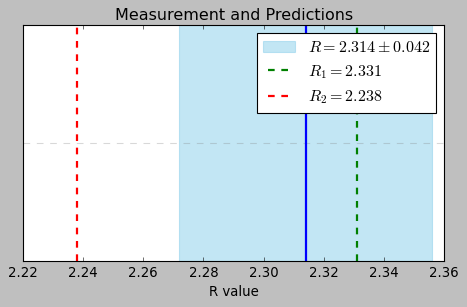

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Measurement
R = 2.314
R_err = 0.042

# Predictions
R1 = 2.331
R2 = 2.238

# Create the figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the 1-sigma band as a horizontal line with uncertainty
ax.axhline(y=1, color='gray', linestyle='--', alpha=0.3)
ax.fill_betweenx([0, 2], R - R_err, R + R_err, color='skyblue', alpha=0.5, label=r'$R = 2.314 \pm 0.042$')
ax.axvline(R, color='blue', linestyle='-', linewidth=2)

# Plot prediction lines
ax.axvline(R1, color='green', linestyle='--', linewidth=2, label=r'$R_1 = 2.331$')
ax.axvline(R2, color='red', linestyle='--', linewidth=2, label=r'$R_2 = 2.238$')

# Labels and legend
ax.set_ylim(0, 2)
ax.set_yticks([])
ax.set_xlabel("R value")
ax.set_title("Measurement and Predictions")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

2.3586098654708523 2.249052648020571 2.2400521508963327
2.235207461919119


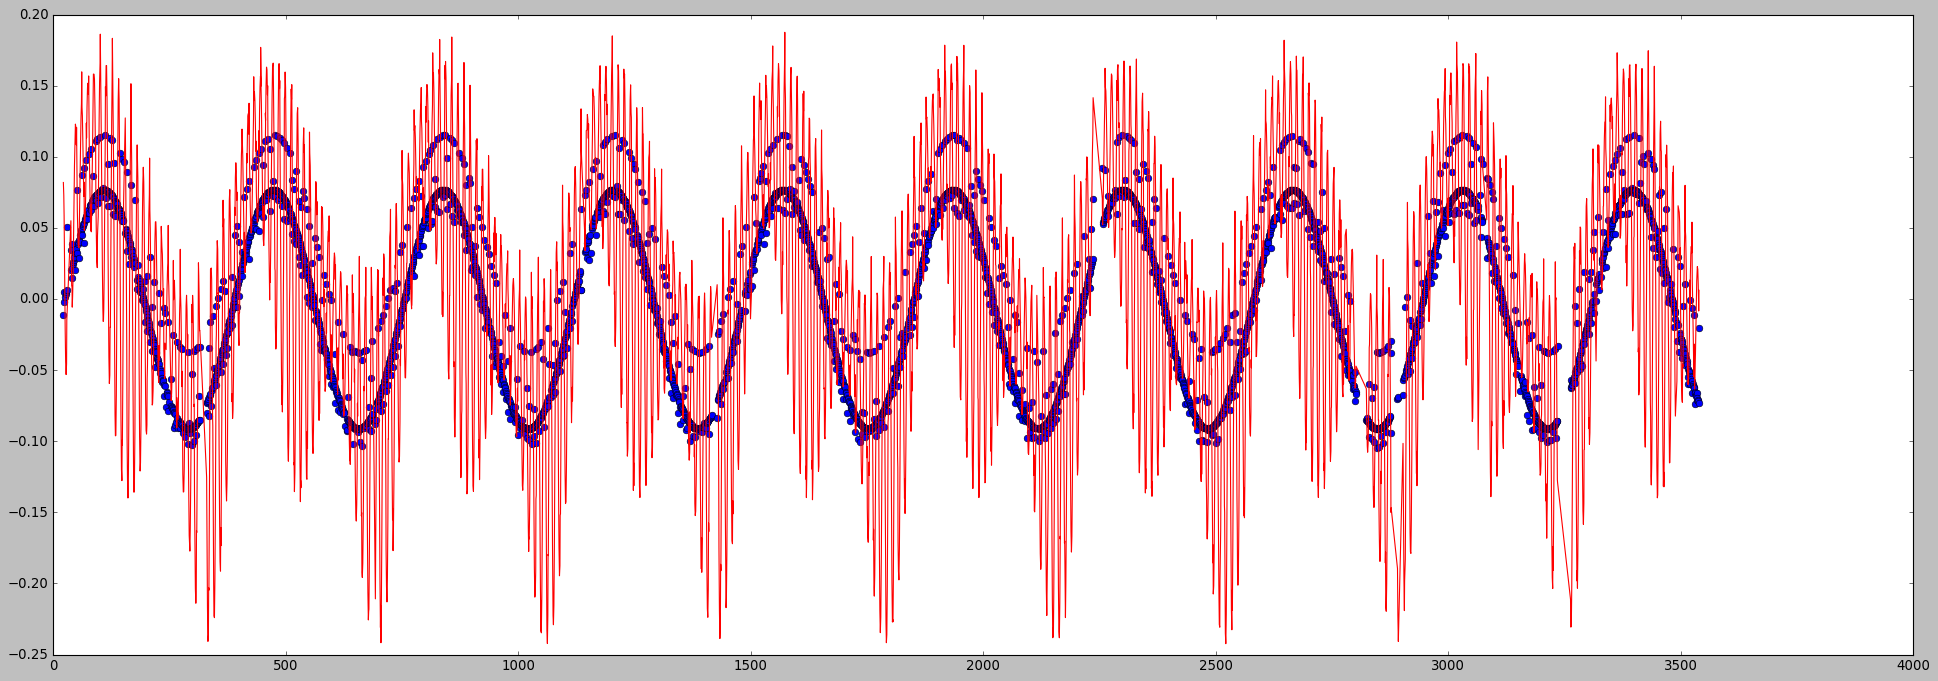

In [62]:
mean_msw = np.mean(msw_signal_fraction)
mean_uldm = np.mean(uldm_signal_fraction)
mean_data = np.mean(data[:,1])

print(mean_data,mean_msw,mean_uldm)

plt.figure(figsize=(30,10))
#plt.xlim(0,600)

time_bins = np.unique(frame_predicted_total_signal.time_day[:,0])

bin_prediction = np.zeros((len(time_bins)))
bin_prediction2 = np.zeros((len(time_bins)))
for i in range(len(time_bins)):
    cond = frame_predicted_total_signal.time_day[:,0] == time_bins[i]
    T_k = np.sum(frame_predicted_total_signal.time_day[cond,2:],axis=1)
    bin_prediction[i] = (1/np.sum(T_k)) * np.sum(T_k * uldm_signal_fraction[cond])
    bin_prediction2[i] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])


prediction = bin_prediction * ( 1 - delta_p * sigma_p)

print(np.mean(prediction))

prediction = prediction - np.mean(prediction)




# plt.plot(data[:,0], prediction[:], 'ro')
# plt.plot(data[:,0], bin_prediction2[:] - np.mean(bin_prediction2), 'bo')
# plt.errorbar(data[:,0], data[:,1] - mean_data, np.array((data[:,3],data[:,2])), fmt='k.')




plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction - mean_msw, 'bo')
plt.plot(frame_predicted_total_signal.time_day[:,1], uldm_signal_fraction - mean_uldm, 'r-')
#plt.errorbar(data[:,0], data[:,1] - mean_data, np.array((data[:,3],data[:,2])), fmt='k.')

In [2]:
def ExposureTime(lam):
    t_year = np.linspace(0,1,365)
    sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * t_year)
    cos_deltas = np.sqrt(1 - sin_deltas**2)
    t_day = np.arange(0,0.5,0.001)

    cos_lam = np.cos(np.radians(lam))
    sin_lam = np.sin(np.radians(lam))

    #labels= [r'$\rm Jan$', r'$\rm Jun$', r'$\rm s$']
    exposure_list = [[]for i in range (4)]

    for i in range(len(sin_deltas)):
        cos_eta = cos_lam * cos_deltas[i] * np.cos(2 * np.pi * t_day) - sin_lam * sin_deltas[i]

        exposure_list[0].append(i)
        

        if len(t_day[cos_eta>=0]) == len(t_day):
            exposure_list[2].append(0)
            exposure_list[3].append(24)
        elif  0 < len(t_day[cos_eta>=0]) < len(t_day)  : 
            exposure_list[2].append(24 - t_day[cos_eta>=0][-1]*24*2)
            exposure_list[3].append(t_day[cos_eta>=0][-1]*24*2)
        else:
            exposure_list[2].append(24)
            exposure_list[3].append(0)


        exposure_list[1].append(t_year[i] * 365)
    return np.array(exposure_list).T

In [3]:
param ={'SinT12'  : 0.307 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0., 
        'mu3'  : 0.  ,
        'mdm'  : 4e-5, 
        'alpha': 0.  ,
        'eps' : 0. ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }

frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

lam_list = []
frame_predicted_total_signal.time_day = ExposureTime(90)
frame_predicted_total_signal.time_ev = frame_predicted_total_signal.time_day[:,1] * 2.4 * 6. * 6. * 1.519 
frame_predicted_total_signal.theta_p = (2 * np.pi / 365.25) * frame_predicted_total_signal.time_day[:,1]
msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 
p_msw = frame_predicted_total_signal.p_msw

frame_predicted_total_signal.time_day = ExposureTime(36)
frame_predicted_total_signal.time_ev = frame_predicted_total_signal.time_day[:,1] * 2.4 * 6. * 6. * 1.519 
frame_predicted_total_signal.theta_p = (2 * np.pi / 365.25) * frame_predicted_total_signal.time_day[:,1]
msw_signal_fraction_2 = frame_predicted_total_signal.__getitem__(param) 
p_msw_2 = frame_predicted_total_signal.p_msw

In [5]:
# plt.plot(frame_predicted_total_signal.energy_obs[:,0], msw_signal_fraction[0,:], 'o')
# plt.plot(frame_predicted_total_signal.energy_obs[:,0], msw_signal_fraction_2[0,:], '*')

In [6]:
# for i in range(12,13):
#     plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction[:,i], '-')
#     plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction_2[:,i], '-')

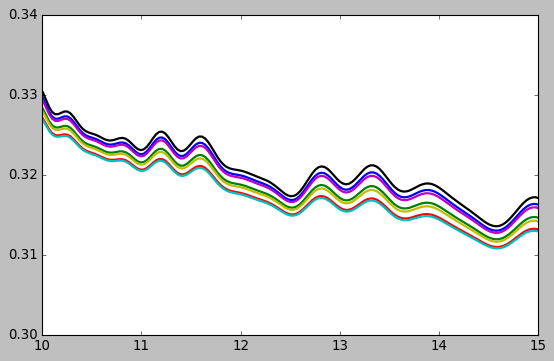

In [4]:
plt.figure(figsize=(8,5))
#plt.xscale('log')
plt.xlim(10,15)
plt.ylim(0.3,0.34)
color_list = ['k','b','g','r','c','y','m']

for i , j in enumerate ([0,50,100,150,200,250,300]):
    plt.plot(frame_predicted_total_signal.energy_nu, p_msw_2[j,:], lw =2, color=color_list[i])

    
#plt.plot(frame_predicted_total_signal.energy_nu, p_msw_2[0,:], lw =2)
#plt.plot(frame_predicted_total_signal.energy_nu, p_msw_2[180,:], lw =2)

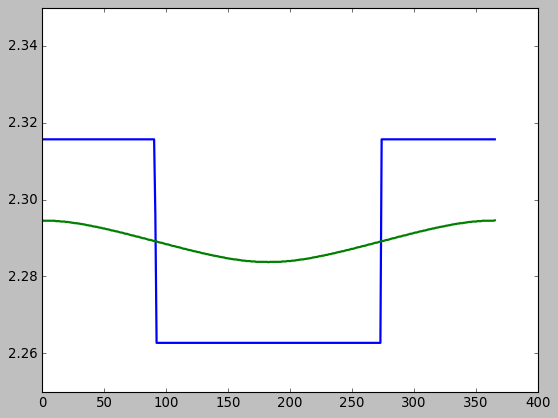

In [6]:
plt.rcParams['axes.formatter.useoffset'] = False
plt.ylim(2.25,2.35)

plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction * ( 1 -  0.016698 * np.cos(frame_predicted_total_signal.theta_p) )**2, lw =2)

# plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction ,lw=2)
# plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction_2 ,lw=2)


plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction_2 * ( 1 -  0.016698 * np.cos(frame_predicted_total_signal.theta_p) )**2, lw =2)

<ErrorbarContainer object of 3 artists>

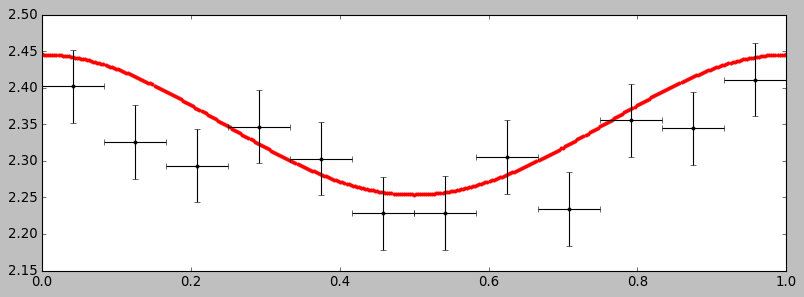

In [6]:
day_from_prehelion = frame_predicted_total_signal.time_day[:,1]

plt.figure(figsize=(12,4))
plt.xlim(0,1)
#plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction , 'b.')


plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction_2 , 'r.')


plt.errorbar(annual_data[:,0], annual_data[:,1], 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')

In [3]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.02, 
        'mu3'  : 0.  ,
        'mdm'  : 0.2 , 
        'alpha': 0.  ,
        'eps' : 0.5  ,
        'alpha_eps' : 0. ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [ ]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.07, 
        'mu3'  : 0.  ,
        'mdm'  : 900*2e-6 , 
        'alpha': 2.  ,
        'eps' : 0.5  ,
        'alpha_eps' : 0. ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [105]:
time_bins = np.unique(frame_predicted_total_signal.time_weights[:,0])
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

for i in range(len(time_bins)):
    cond = frame_predicted_total_signal.time_weights[:,0] == time_bins[i]
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = data[i,0]

<ErrorbarContainer object of 3 artists>

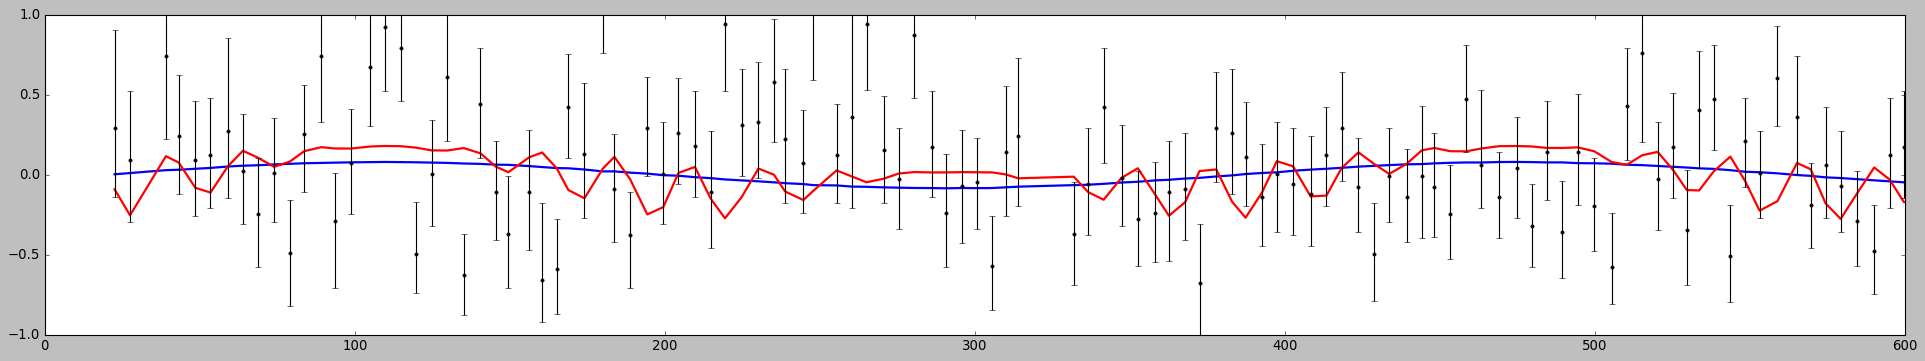

In [106]:
plt.figure(figsize=(30,5))
plt.xlim(0,600)
plt.ylim(-1,1)

#plt.plot(frame_predicted_total_signal.time_weights[:,1], msw_signal_fraction, 'b.')
#plt.plot(frame_predicted_total_signal.time_weights[:,1], ULDM_signal_fraction, 'r.')


plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] - np.mean(bin_prediction_msw[:,1]),lw=2,ls='-',color='b')
plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1] - np.mean(bin_prediction_uldm[:,1]), lw=2,ls='-',color='r')


plt.errorbar(data[:,0], data[:,1] - np.mean(data[:,1]), np.array((data[:,3],data[:,2])), fmt='k.')

In [84]:
day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

time_bins = np.linspace(0,1,13)
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

for i in range (len(time_bins)-1):
    cond = (((day_from_prehelion % 365.25)/365.25) >= time_bins[i]) & (((day_from_prehelion % 365.25)/365.25) < time_bins[i+1])
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = annual_data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = annual_data[i,0]
    

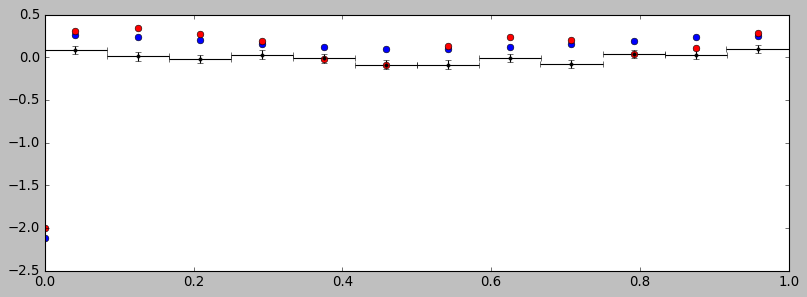

In [87]:
plt.figure(figsize=(12,4))
plt.xlim(0,1)

plt.errorbar(annual_data[:,0], annual_data[:,1] - np.mean(annual_data[:,1]), 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')



#plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction , 'b.')
#plt.plot(((day_from_prehelion % 365.25)/365.25), ULDM_signal_fraction , 'r.')

# plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] ,'o')
# plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1],'o')


plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] - np.mean(bin_prediction_msw[:,1]),'o',color='b')
plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1] - np.mean(bin_prediction_uldm[:,1]), 'o',color='r')